In [1]:
def readFile(filename):
    age_raw = []
    distance_raw = []
    m = 0
    with open(filename,'r') as file_to_read:
        file_to_read.readline()
        while True:    
            lines = file_to_read.readline()
            if not lines:
                break
            m += 1
            age_tmp, dis_tmp = [int(i) for i in lines.split()] 
            age_raw.append(age_tmp)  
            distance_raw.append(dis_tmp)
            age = [(i-18)/64 for i in age_raw]
            distance = [(i-280)/310 for i in distance_raw]
    #print('member:',m)
    #print('age:',age)
    #print('distance:',distance)
    return m,age,distance

In [2]:
def plotPot(age,distance,theta_0,theta_1):
    plt.scatter(age,distance)
    x = np.linspace(0,1,10)
    y = theta_0 + theta_1 * x
    plt.plot(x,y,color='blue')
    plt.xlabel('age')
    plt.ylabel('distance')
    plt.show()

In [3]:
def reshapeData(age,distance):
    X = np.matrix(age)
    y = np.matrix(distance)
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    return X,y

In [4]:
def computeCost(X,y,theta_0,theta_1):
    square_loss = np.power((theta_0 + X*theta_1 - y),2)
    loss = 1/(2*m)*np.sum(square_loss)
    print('cost:',loss)
    return loss

In [7]:
def gradientDescent(X,y,theta_0,theta_1,lr,epsilon):
    loss = 5
    while loss > epsilon:
        single_loss = theta_0 + X*theta_1 - y
        delta_theta_0 = (1/m)*np.sum(single_loss)
        delta_theta_1 = (1/m)*np.sum(np.multiply(single_loss,X))
        temp_0 = theta_0-lr*delta_theta_0
        temp_1 = theta_1-lr*delta_theta_1
        theta_0 = temp_0
        theta_1 = temp_1
        loss = computeCost(X,y,theta_0,theta_1)
    #print("cost:",loss)
    return theta_0,theta_1

cost: 0.05071478450449232
cost: 0.03849675105631308
cost: 0.03361478334960804
cost: 0.02999243096338044
cost: 0.027008968970934185
cost: 0.024523540592955258
cost: 0.022450590468886266
cost: 0.020721459118974325
cost: 0.01927910349536557
cost: 0.018075960487832617
cost: 0.017072356901465847
cost: 0.016235199418945304
cost: 0.015536883210274575
cost: 0.01495438166482145
cost: 0.014468487099799593
cost: 0.014063177396913833
cost: 0.013725087681409455
cost: 0.013443069622340072
cost: 0.013207823822205006
cost: 0.01301159317419685
cost: 0.012847907075675251
cost: 0.012711368063440483
cost: 0.0125974738352169
cost: 0.012502468788598132
cost: 0.012423220182028566
cost: 0.012357114834294575
cost: 0.012301972956245329
cost: 0.012255976273389452
cost: 0.012217608069247859
cost: 0.012185603172423808
cost: 0.012158906238240027
cost: 0.012136636949301782
cost: 0.012118060987492804
cost: 0.012102565820220712
cost: 0.012089640502476235
cost: 0.012078858828689703
cost: 0.012069865278825987
cost: 0.01

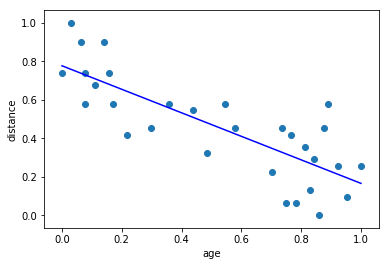

In [8]:
import numpy as np
import matplotlib.pyplot as plt

filename = "4-data.txt"
theta_0 = 0
theta_1 = 0
lr = 1
epsilon = 0.01203

m,age,distance = readFile(filename)
X,y = reshapeData(age,distance)
theta_0,theta_1 = gradientDescent(X,y,theta_0,theta_1,lr,epsilon)
print('theta_0:',theta_0,'  theta_1:',theta_1)
plotPot(age,distance,theta_0,theta_1)